In [1]:
import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
df = pd.read_csv('weatherHistory.csv')
# print(df.columns)
x = df['Temperature (C)'][:100]
y = df['Humidity'][:100]

In [3]:
fig, ax = plt.subplots()
ax.plot(x,y, 'b*')
plt.savefig('temp_humidity.png',bbox_inches='tight', dpi=300)
plt.close()

## Least-Squares Estimation

In [4]:
x2 = sm.add_constant(x) 
modl = sm.OLS(y,x2) 
mod12=modl.fit() 
print(mod12.summary())

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     204.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           1.08e-25
Time:                        23:25:07   Log-Likelihood:                 98.943
No. Observations:                 100   AIC:                            -193.9
Df Residuals:                      98   BIC:                            -188.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.1034      0.027     

/Users/utpalkumar50/miniconda3/envs/dataScience/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [5]:
mod12.params

const              1.103427
Temperature (C)   -0.030871
dtype: float64

In [6]:
## Error
e=mod12.resid
e

0     0.078994
1     0.045392
2     0.076078
3    -0.017538
4    -0.003131
        ...   
95   -0.140915
96   -0.127551
97   -0.129781
98   -0.055521
99   -0.121153
Length: 100, dtype: float64

In [7]:
estd = np.std(e)
estd

0.08996207447870591

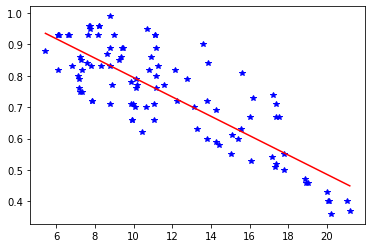

In [16]:
fig, ax = plt.subplots()
ax.plot(x,y, 'b*')
xx = np.linspace(np.min(x), np.max(x), 100)
yy =  mod12.params[1]* xx +  mod12.params.const
ax.plot(xx,yy, 'r-')  

In [9]:
emean = np.mean(e)
emean

1.1046719095020308e-16

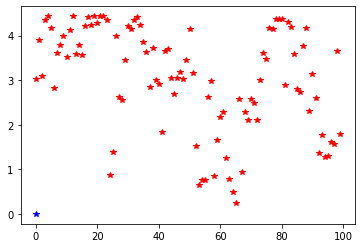

In [10]:
fig, ax = plt.subplots()
ax.plot(norm.pdf(e, loc=emean, scale=estd), 'r*')
ax.plot(emean, 'b*')

## Maximum Likelihood Estimation

In [11]:
def lik(parameters, x, y): 
    m = parameters[0] 
    b = parameters[1] 
    sigma = parameters[2] 
    
    y_exp = m * x + b 
        
    L = np.sum(np.log(norm.pdf(y - y_exp, loc = 0, scale=sigma)))
    return -L


def constraints(parameters):
    sigma = parameters[2]
    return sigma

cons = {
    'type': 'ineq',
    'fun': constraints
}

In [12]:
lik_model = minimize(lik, np.array([2, 2, 2]), args=(x,y,), constraints=cons)

/Users/utpalkumar50/miniconda3/envs/dataScience/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/utpalkumar50/miniconda3/envs/dataScience/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [13]:
lik_model

     fun: -98.9428558904145
     jac: array([-0.0995636 , -0.00924873,  0.0002718 ])
 message: 'Optimization terminated successfully.'
    nfev: 387
     nit: 65
    njev: 65
  status: 0
 success: True
       x: array([-0.03087142,  1.10342661,  0.08996208])

In [14]:
lik_model.x

array([-0.03087142,  1.10342661,  0.08996208])

In [19]:
fig, ax = plt.subplots()
ax.plot(x,y, 'b*')
xx = np.linspace(np.min(x), np.max(x), 100)
yy = lik_model.x[0] * xx +  lik_model.x[1] #+  lik_model.x[2]
ax.plot(xx,yy, 'r-')                                                 
plt.savefig('temp_humidity_regression.png',bbox_inches='tight', dpi=300)
plt.close()